In [3]:
import numpy as np
import seaborn as sns
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib

import graspy as gp
from graspy.plot import heatmap

In [6]:
# Import HCP subject 100307 LR.
img = nib.load("../data/rfMRI_REST1_LR_Atlas_hp2000_clean_filt_sm6.Schaefer400_7Network.ptseries.nii")
hcp = np.array(img.get_fdata())
n_hcp = hcp.shape[0]

# Import MSC subject 01 session 01.
img = nib.load("../data/sub-MSC01_ses-func01_task-rest_Schaefer400.ptseries.nii")
msc = np.array(img.get_fdata())
n_msc = msc.shape[0]

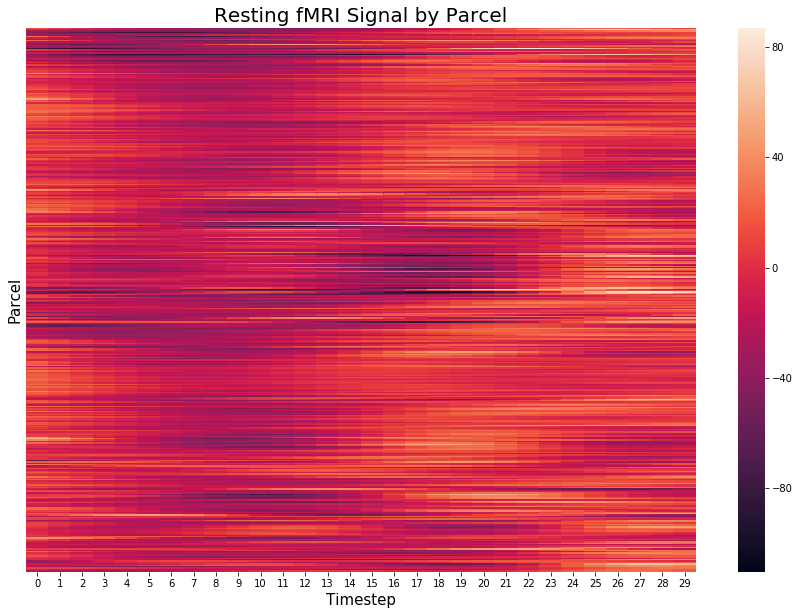

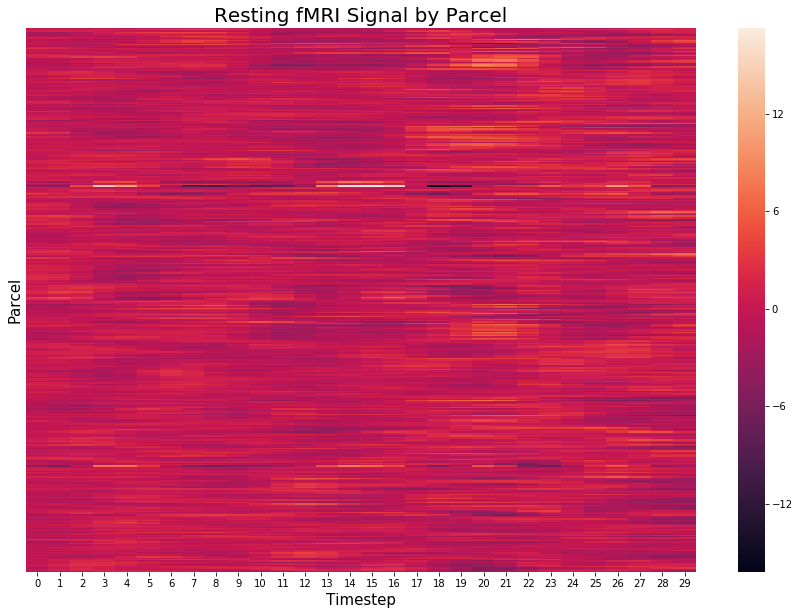

In [7]:
# Visualize subject 100307 and MSC subject 01 session 01.
for data in [hcp, msc]:
    timesteps = 30
    displayed_data = np.transpose(data[range(timesteps),:])
    plt.subplots(figsize=(15,10))
    ax = sns.heatmap(displayed_data, yticklabels=False)

    plt.title('Resting fMRI Signal by Parcel', fontsize = 20)
    plt.ylabel('Parcel', fontsize = 15)
    plt.xlabel('Timestep', fontsize = 15)
    plt.show()

In [ ]:
# 22-by-22 experiment, M=1
p = 22
n = 1200
test_statistic = np.zeros((p,p))
optimal_lag = np.zeros((p,p))
optimal_scale_X = np.zeros((p,p))
optimal_scale_Y = np.zeros((p,p))

# Read files and combine into matrix.
for i in range(4):
    filename = "results/result_22_%d.pkl" % i
    pickle_in = open(filename,"rb")
    results = np.asarray(pickle.load(pickle_in))
    
    for result in results:
        # output = (i, j, test_statistic, optimal_lag, optimal_scale_X, optimal_scale_Y)
        k = int(result[0])
        l = int(result[1])
        test_statistic[k,l] = result[2]
        optimal_lag[k,l] = int(result[3])
        optimal_scale_X[k,l] = result[4] / n
        optimal_scale_Y[k,l] = result[5] / n

# Read the specific ROIs needed for analysis.
roi = pd.read_excel(r"HCPMMP_ROIs.xlsx")
# roi_indices = np.asarray(roi["key"])[range(22)]
roi_labels = np.asarray(roi["Yeo7Network"])[range(22)]

In [ ]:
# Visualize test statistic.

sns.set(rc={'figure.figsize':(15,13)})
ax = sns.heatmap(test_statistic)
plt.title("MGCX Test Statistic", fontsize = 20)
plt.ylabel('Parcel', fontsize = 15)
plt.xlabel('Parcel', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=12)
# for tick in ax.yaxis.get_majorticklabels():
    # tick.set_verticalalignment("bottom")
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
plt.yticks(range(22), roi_labels, rotation=0)
plt.xticks(range(22), roi_labels, rotation=90)
plt.show()

In [ ]:
# Visualize optimal lag.

sns.set(rc={'figure.figsize':(15,13)})
ax = sns.heatmap(optimal_lag)
plt.title("Optimal Lag", fontsize = 20)
plt.ylabel('Parcel', fontsize = 15)
plt.xlabel('Parcel', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=12)
# for tick in ax.yaxis.get_majorticklabels():
    # tick.set_verticalalignment("bottom")
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
plt.yticks(range(22), roi_labels, rotation=0)
plt.xticks(range(22), roi_labels, rotation=90)
plt.show()

In [ ]:
# Visualize optimal scale.

sns.set(rc={'figure.figsize':(15,13)})
ax = sns.heatmap(optimal_scale_X)
plt.title("Optimal Scale X", fontsize = 20)
plt.ylabel('Parcel', fontsize = 15)
plt.xlabel('Parcel', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=12)
# for tick in ax.yaxis.get_majorticklabels():
    # tick.set_verticalalignment("bottom")
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
plt.yticks(range(22), roi_labels, rotation=0)
plt.xticks(range(22), roi_labels, rotation=90)
plt.show()

sns.set(rc={'figure.figsize':(15,13)})
ax = sns.heatmap(optimal_scale_Y)
plt.title("Optimal Scale Y", fontsize = 20)
plt.ylabel('Parcel', fontsize = 15)
plt.xlabel('Parcel', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize=12)
# for tick in ax.yaxis.get_majorticklabels():
    # tick.set_verticalalignment("bottom")
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("left")
plt.yticks(range(22), roi_labels, rotation=0)
plt.xticks(range(22), roi_labels, rotation=90)
plt.show()

In [ ]:
# Plotting
import matplotlib as mpl

np.random.seed(8888)

cmap = mpl.cm.get_cmap("RdBu_r")
center = 0
vmin = 0
vmax = 1
norm = mpl.colors.Normalize(0, 1)
cc = np.linspace(0.5, 1, 256)
cmap = mpl.colors.ListedColormap(cmap(cc))

heatmap_kws = dict(
    cbar=False,
    font_scale=1.4,
    vmin=0,
    vmax=1,
    inner_hier_labels=roi_labels,
    hier_label_fontsize=16,
    cmap=cmap,
    center=None,
)
side_label_kws = dict(labelpad=45, fontsize=24)


fig, ax = plt.subplots(1, 2, figsize=(20, 16))

# SBM
heatmap(optimal_scale_X, ax=ax[0], **heatmap_kws)
heatmap(optimal_scale_Y, ax=ax[1], **heatmap_kws)
plt.title("hiiiiiiiiiii")

plt.tight_layout()

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(optimal_scale_X)
cbar = fig.colorbar(
    sm, ax=ax, orientation="horizontal", pad=0.01, shrink=0.8, fraction=0.1
)
cbar.ax.tick_params(labelsize=16)

plt.savefig(
    "optimal_scale.png",
    facecolor="w",
    format="png",
    bbox_inches="tight",
)

plt.show()